# CPSC 483 Intro to Machine Learning Project 1
### By: Jeremy Rico

Dataset: male400.csv - data collected from Olympic trials of mens 400m dash times from the years 1896 - 2008

In this program we will approach the dataset with a few different machine learning approaches to extrapolate the data. We will use a few different type of regression as seen below and determine which method best fits the data.
1. Linear
2. 3rd order polynomial
3. 5th order polynomial

We will then ad L2 regularization to the code to fit a 5th order polynomial and do some experimenting with hyperparameters (particularly the learning rate) to see which model best fits the data.
    

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

### Average Squared Loss function
Works according to the following equation:
$$\frac{1}{N}\displaystyle\sum_{n=1}^{N} (t_n - y_n)^2$$
Where $t_n$ is the target value and $y_n$ is the predicted value obtained using the appropriate regression function: $$ y_n = f(x; w_0, w_1, ... w_n) $$

In [2]:
# simple function to calculate average squared loss between two arrays; target and predicted
def avgSqrdLoss(targets, predictions):
    loss = targets - predictions
    return np.multiply(loss, loss).mean()

Read in data from .csv file and store in np arrays

In [3]:
data = np.genfromtxt('male400.csv', delimiter = ',', skip_header=1)
years = data[:, 0]
times = data[:, 1]

## 1. Load the data from male400.csv and create a scatter plot similar to Figure 1.1 in the textbook. Does the relationship appear to be linear?

Text(0.5, 1.0, 'Olympic Mens 400m Times')

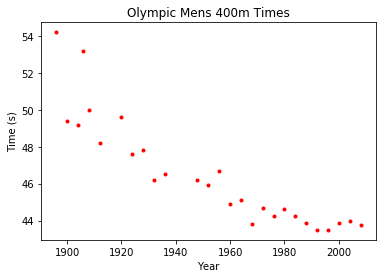

In [4]:
plt.plot(years, times, 'r.', label='Raw')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic Mens 400m Times')


A: The data does not appear to be linear. It appears to be more of an exponential curve that will eventually level out. From the data below it appears that the curve will approach 40s in the years to come.

## 2. Use linear regression to fit a line to the data. Add the line to the scatterplot as in Figure 1.5 in the textbook. Compute the loss for the linear model.

### Linear Regression Model
Linear model calculated using the following method:

$$y = \hat{w_{0}}+ \hat{w_{1}}*x$$

$$\hat{w_{0}} = \bar{t} - \hat{w_{1}} * \bar{x}$$

$$\hat{w_{1}} = \frac{\bar{xt} - (\bar{x} * \bar{t})} {\bar{x^2} - \bar{x}^2}$$

In this case, our target value (t) is the recorded times, and the independent varibale (x) is the year so:

In [5]:
# calculate relevant variables
x_bar = years.mean()
t_bar = times.mean()
x_bar_2 = x_bar**2
x_2_bar = np.multiply(years, years).mean()
xt_bar = np.multiply(years,times).mean()

w1_hat = (xt_bar - (x_bar * t_bar)) / (x_2_bar - x_bar_2) 
w0_hat = t_bar - (w1_hat * x_bar)

# plug in values to linear regression model
y_linregress = w1_hat * years + w0_hat

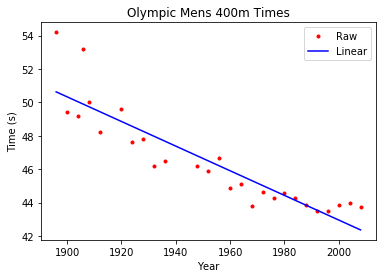

In [27]:
# Plot linear regression model with raw scatter plot
plt.plot(years, times, 'r.', label='Raw')
plt.plot(years, y_linregress, 'b-', label='Linear')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic Mens 400m Times')
plt.legend()

### Calculate loss for linear model

In [28]:
linLoss = avgSqrdLoss(times, y_linregress)
print("Linear Model Loss: ", linLoss)

Linear Model Loss:  1.5780331724469312


### Review:

According to the plot and error calculation, it doesn't look like the linear model fits the data all that well. While we don't have any otehr models to compare it too, an error rate over 1.0 can certainly be improved upon.

Furthermore, at a linear rate, our model predicts that eventually a human will be able to complete the 400m dash in 0 or even negative time. We all know this is not possible (except for The Flash), so lets fit some different models to our data.

## 3. Fit a 3rd order polynomial to the data. Compare the loss for this model with the loss for the linear model.


### 3rd Order Polynomial

Simply use numpy method polyfit to get an array of exponents for a nth degree polynomial. Then call poly1d to return a model that we can plug in our original data to return new y values.

In [29]:
poly3 = np.poly1d(np.polyfit(years, times, 3))

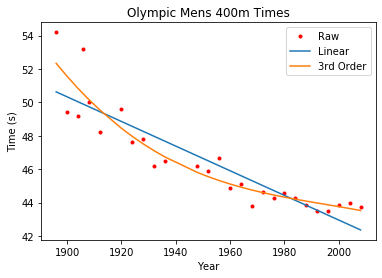

In [30]:
# Plot linear regression model with raw scatter plot
plt.plot(years, times, 'r.', label='Raw')
plt.plot(years, y_linregress, label='Linear')
plt.plot(years, poly3(years), label="3rd Order")
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic Mens 400m Times')
plt.legend()

In [31]:
poly3Loss = avgSqrdLoss(times, poly3(years))
print("3rd Order Polynomial Loss: ", poly3Loss)

3rd Order Polynomial Loss:  0.9738943980005751


### Review:

Now this looks much better! The third order polynomial accounts for the curve in the data and decreases our error by around 38.3% from the linear model. 

This model is a vast improvement from the linear one, but perhaps it could still be improved. So lets try again with a higher degree polynomial.

## 4. Fit a 5th order polynomial to the data. Compare its loss to the previous two models.

### Fifth Order Polynomial

Same method as used above for the third order polynomial

In [32]:
poly5 = np.poly1d(np.polyfit(years, times, 5))

## 5. Plot the 3rd and 5th order polynomials on a scatter plot of the data. Which polynomial looks like a better model of the data?

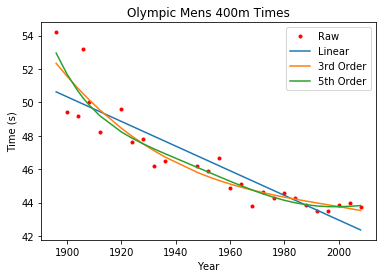

In [33]:
# Plot linear regression model with raw scatter plot
plt.plot(years, times, 'r.', label='Raw')
plt.plot(years, y_linregress, label='Linear')
plt.plot(years, poly3(years), label="3rd Order")
plt.plot(years, poly5(years), label="5th Order")
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic Mens 400m Times')
plt.legend()

In [22]:
poly5Loss = avgSqrdLoss(times, poly5(years))
print("5th Order Polynomial Loss: ", poly5Loss)

5th Order Polynomial Loss:  0.9232230464092152


### Review:

This model may not be the vast improvement that we saw from the linear to the third degree polynomial model, but it is still an improvement. The fifth order polynomial fits the data slightly better than the third order polynomial. While it may not be obvious from looking at the graph, we can judge the improvement based on the error rate derease from 0.974 to 0.923; a 5.24% improvement.

So even though the improvement is small, the fifth order polynomial undoubtably fits the data more accuratley than the third order polynomial

## 6. Add L2 regularization to the code, then fit a 5th order polynomial. Plot models for λ = 0.01, 0.1, 1, 10, and 100. Which value of λ seems to fit the data the best?